In [1]:
import numpy as np 
import pandas as pd 
import json
import os
from top2vec import Top2Vec

In [2]:
df = pd.read_csv("/home/duvuki/omdena-colombia-socialnetwork/src/data/task-2-preprocessing/merged_data/Final/Final_all.csv", usecols = ["preprocessed_data_without_hashtags"])
df.head()

,preprocessed_data_without_hashtags
0,"['hacer', 'mayo', 'cazar', 'fantasma']"
1,"['despues', 'esperar', 'ancia', 'ahora', 'espe..."
2,"['esperar', 'llegar', 'oido', 'nuevo', 'inicia..."
3,"['menos', 'mes', 'urkullu', 'temer', 'perder',..."
4,"['edicion', 'festival', 'internacional', 'puen..."


In [3]:
doc = df['preprocessed_data_without_hashtags'].values.tolist()

## Train Top2Vec Model

##### Resources used: https://jovian.ai/kamilpolak/top2vec-internet-news-topic-modeling; https://www.kaggle.com/dangelov/covid-19-topic-modeling-and-search-with-top2vec

#### Parameters:

##### - documents: Input corpus, should be a list of strings.
##### - speed: This parameter will determine how fast the model takes to train. The 'fast-learn' option is the fastest and will generate the lowest quality vectors. The 'learn' option will learn better quality vectors but take a longer time to train. The 'deep-learn' option will learn the best quality vectors but will take significant time to train.
##### - workers: The amount of worker threads to be used in training the model. Larger amount will lead to faster training.

In [4]:
model = Top2Vec(documents=doc, speed="deep-learn", workers=8)

2021-09-11 19:51:20,483 - top2vec - INFO - Pre-processing documents for training
2021-09-11 19:51:21,604 - top2vec - INFO - Creating joint document/word embedding
2021-09-11 20:10:00,856 - top2vec - INFO - Creating lower dimension embedding of documents
2021-09-11 20:10:30,363 - top2vec - INFO - Finding dense areas of documents
2021-09-11 20:10:32,533 - top2vec - INFO - Finding topics


## Explore Top2Vec Discovered Topics

In [5]:
#get the number of topics
model.get_num_topics()

281

In [6]:
#Get Topics
#This will return the topics in decreasing size.

topic_words, word_scores, topic_nums = model.get_topics(281)

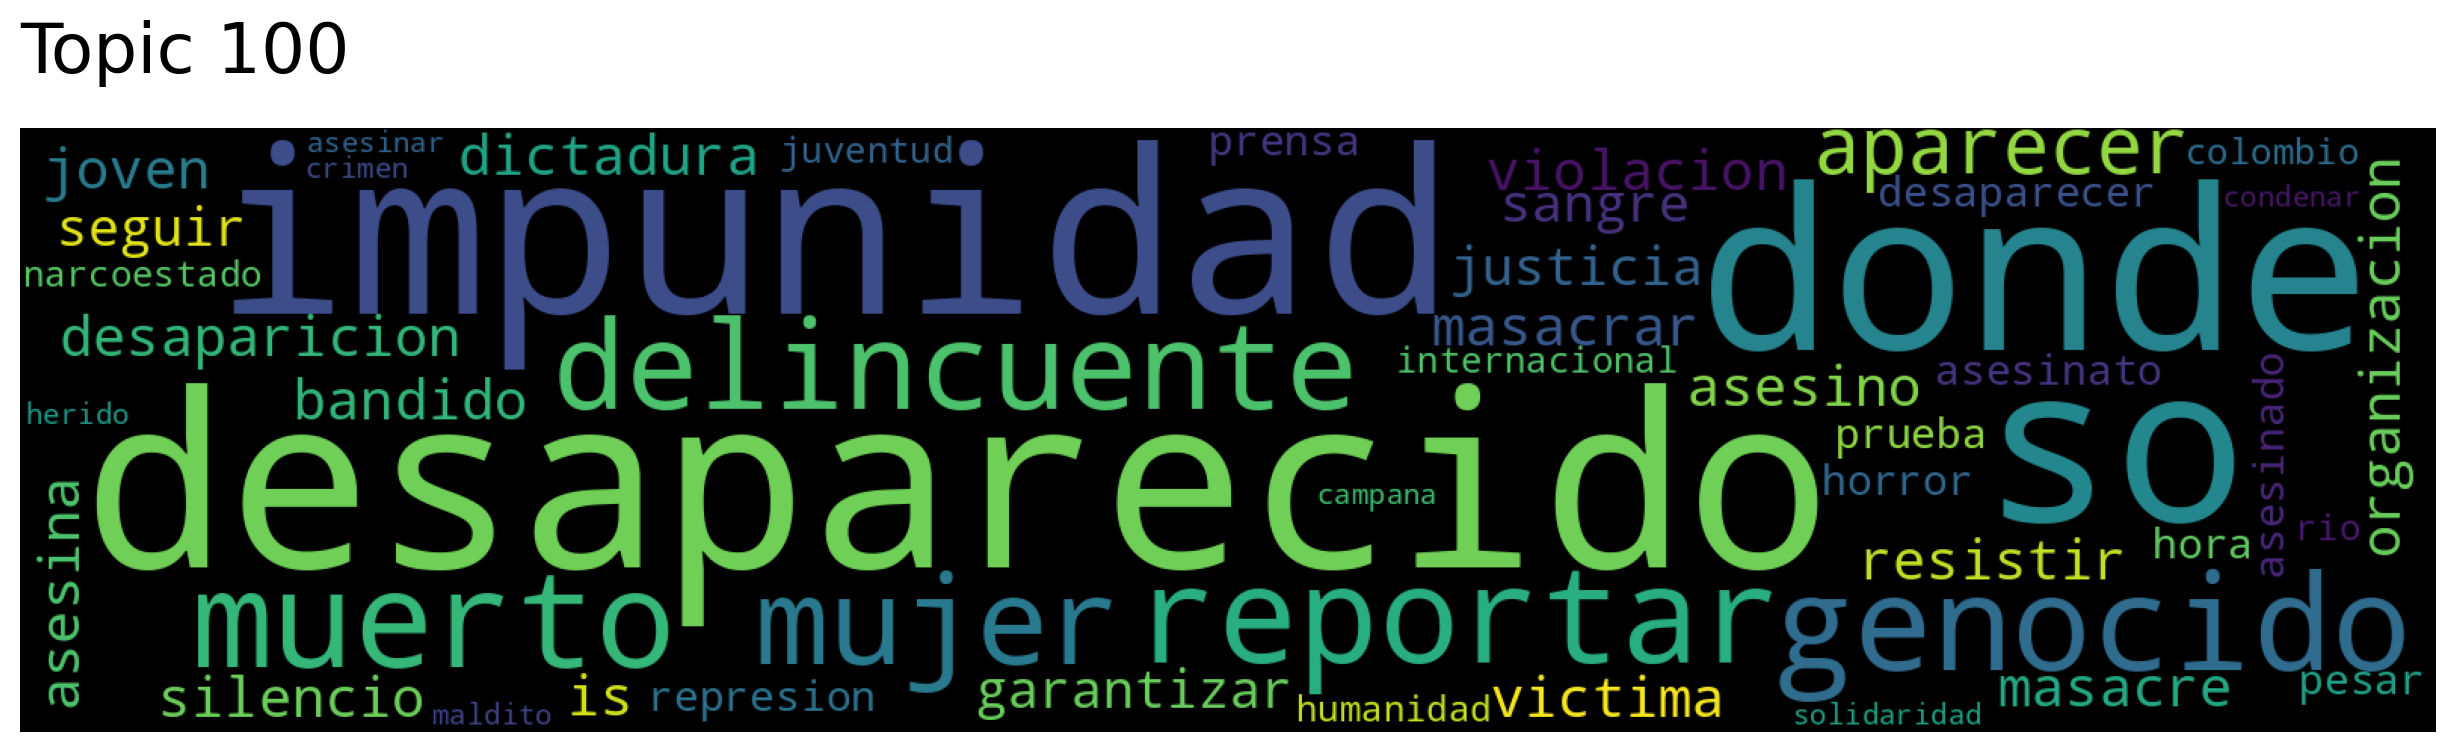

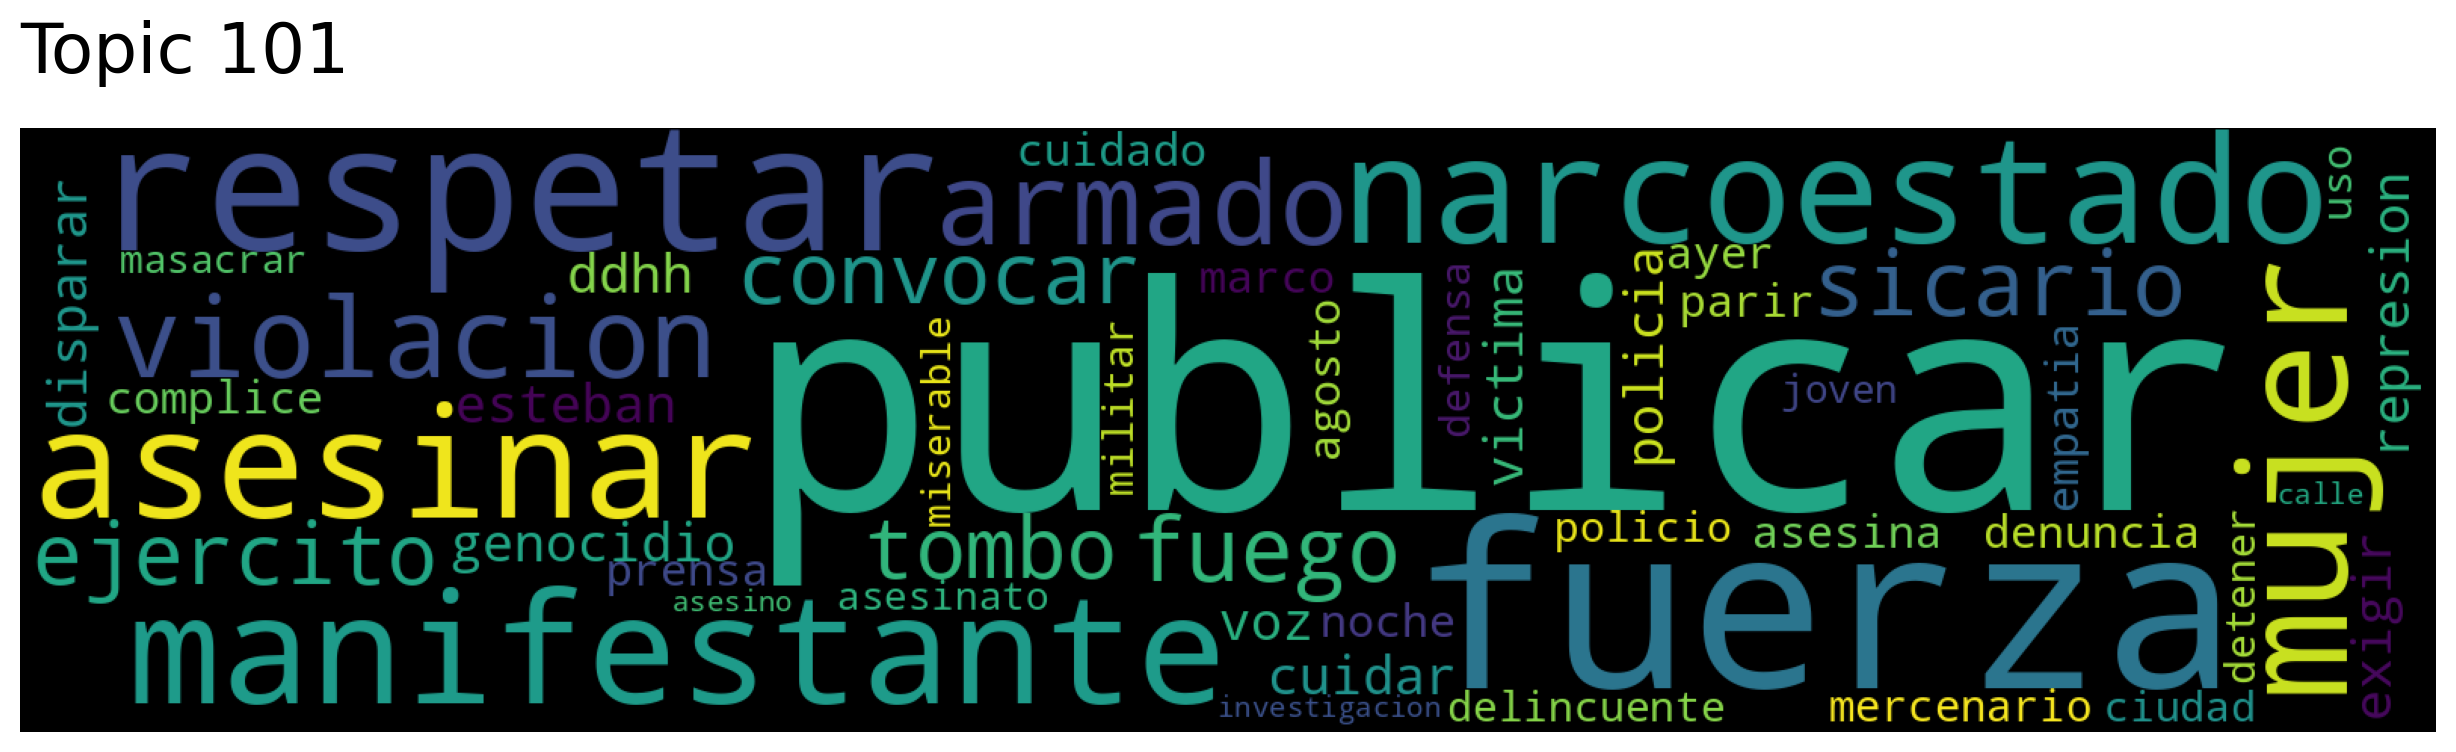

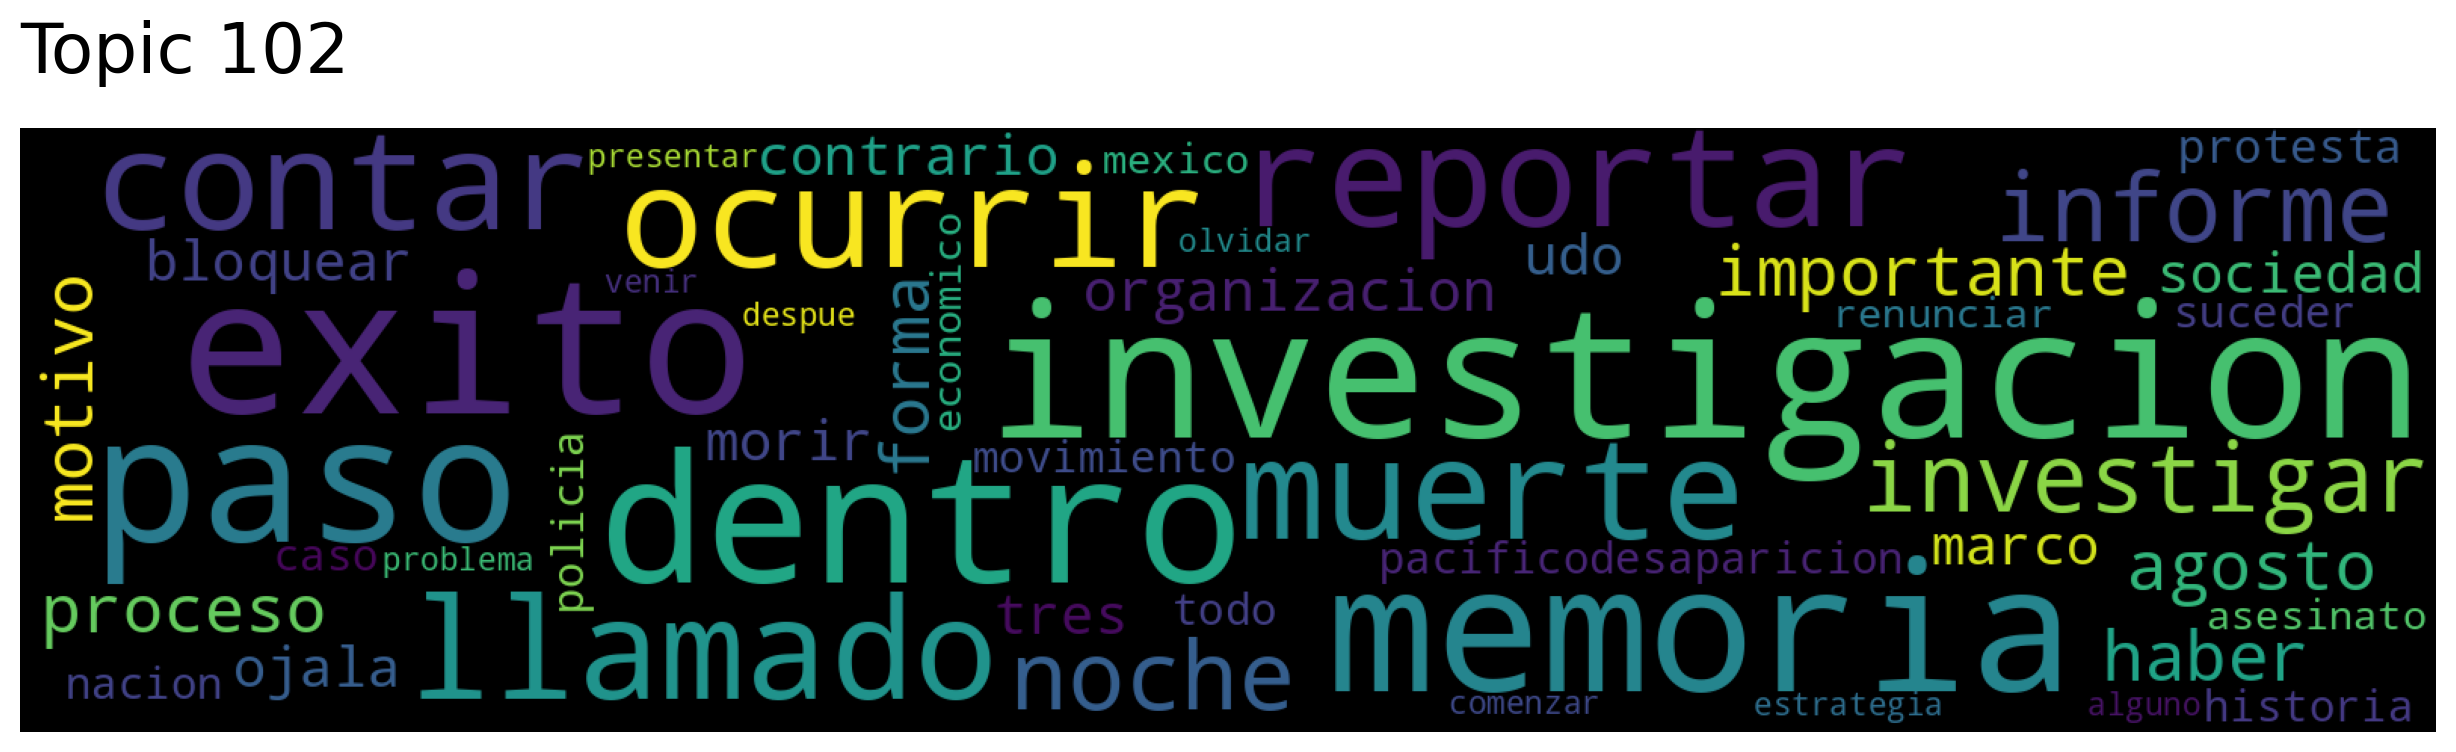

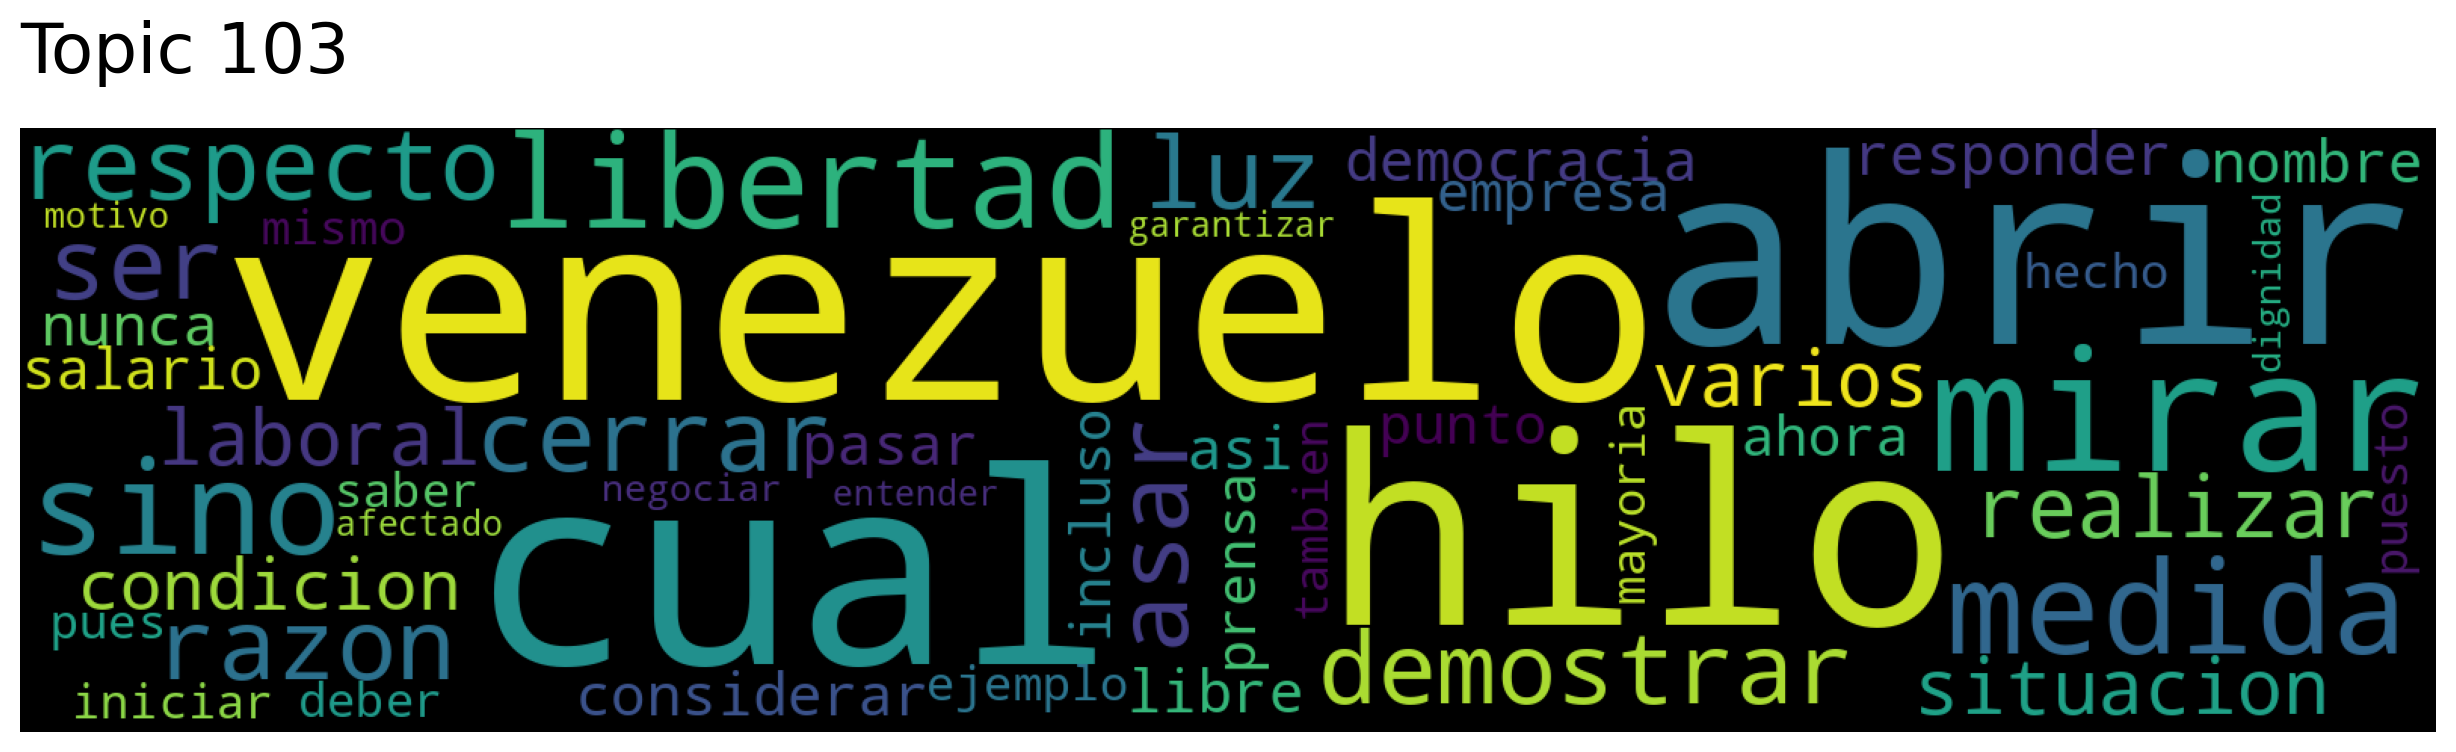

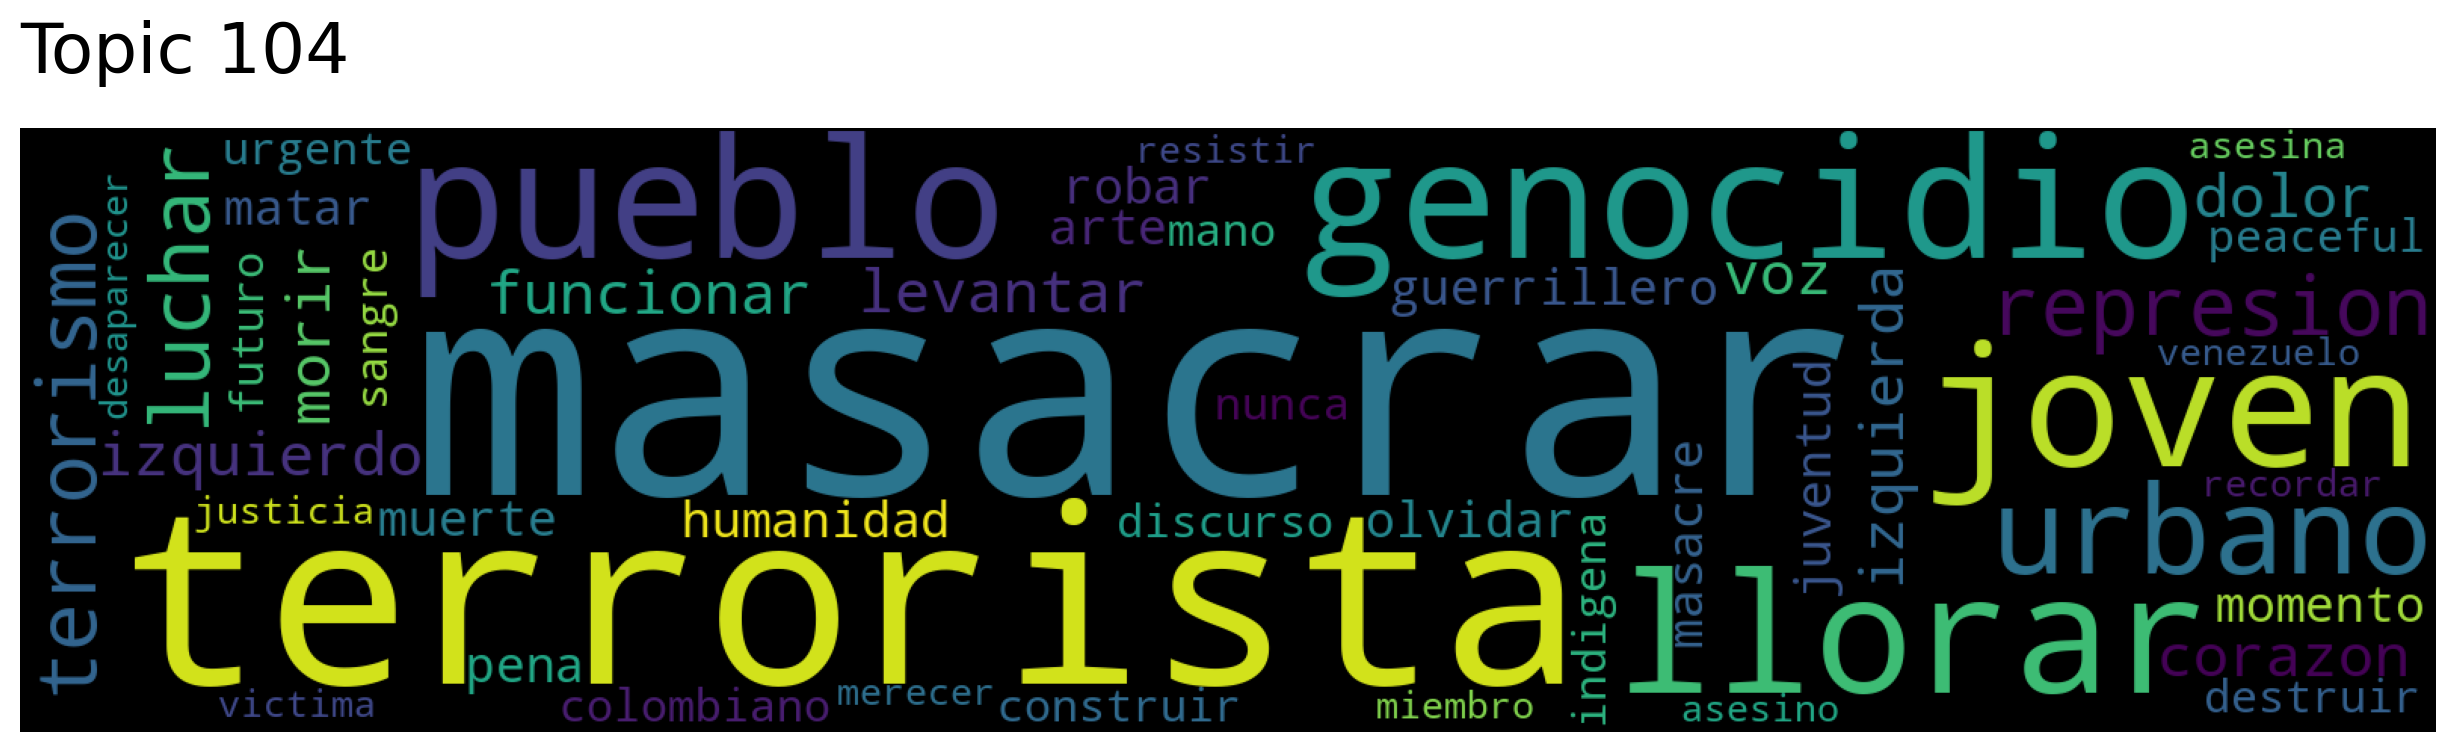

In [7]:
#Generate Word Clouds
for topic in topic_nums[100:105]:
    model.generate_topic_wordcloud(topic, background_color="black")

In [8]:
#Search Tweets by Topic
#We are going to search by topic 15
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=15, num_docs=2)


In [9]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=15, num_docs=2)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Tweet: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Tweet: 16112, Score: 0.9177688956260681
-----------
['solo', 'hacer', 'ultra', 'izquierda', 'pueblo']
-----------

Tweet: 8412, Score: 0.8930574059486389
-----------
['izquierda', 'querer', 'parche']
-----------



## Similar Keywords

In [10]:
#Search for similar words to colombia
words, word_scores = model.similar_words(keywords=["colombia"], keywords_neg=[], num_words=10)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

social 0.3995631072988136
right 0.398003140961482
hope 0.38328536269043734
control 0.37679799497615907
people 0.3755055614453894
real 0.3716715027012498
farc 0.36981221740626913
human 0.35175893473981
yes 0.34674214993675956
family 0.3446597719047384


## Search Tweets by Keywords

In [11]:
# getting error
documents, document_scores, document_nums = model.search_documents_by_keyword(keywords=["colombia", "strike"], num_docs=4)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()


AttributeError: 'Top2Vec' object has no attribute 'search_documents_by_keyword'